# Almond-GPT

#### Importing the libraries

In [48]:
import requests
import os
import sys
import json
from pathlib import Path
from datasets import load_dataset
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Setup env
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

#### Loaded the dataset

In [4]:
# create path folder to saving raw data
ROOT_DIR = Path.cwd().parent
RAW_DATA_PATH = ROOT_DIR / "data" / "raw"
if not os.path.exists(RAW_DATA_PATH):
    os.mkdirs(RAW_DATA_PATH, exist_ok=True)
    print(f"Directory {RAW_DATA_PATH} succesfully create!!!")

output_file = RAW_DATA_PATH / "input.txt"
print(f"File will save in this path {output_file}")

File will save in this path C:\Users\User\Documents\AdinTech\100DaysPython\AI&MLEnthusiast\Model to Web\almond-gpt\data\raw\input.txt


In [5]:
print("Pulling datasets on Hugging Face...")
try:
    '''Get datasets HuggingFace'''
    dataset = load_dataset("databricks/databricks-dolly-15k", split='train')
    limit = 15000
    with open(output_file, 'w', encoding='utf-8') as f:
        for i in range(limit):
            row = dataset[i]
            instruction = row['instruction']
            response = row['response']

            # Store into txt with format QA
            f.write(f"User: {instruction}\nAlmond: {response}\n\n")
    print(f"Dataset succesfully store in {output_file} and size dataset {os.path.getsize(output_file) / 1024:.2f} KB")
except Exception as e:
    print(f"Dataset not found, make sure path correct")

Pulling datasets on Hugging Face...
Dataset succesfully store in C:\Users\User\Documents\AdinTech\100DaysPython\AI&MLEnthusiast\Model to Web\almond-gpt\data\raw\input.txt and size dataset 6622.36 KB


#### Overview

In [12]:
# Convert to dataframe to easily explorations
df = pd.DataFrame(dataset)
print('Dataset Info:')
df.info()
print('Total row of dataset:', len(df))
print('Shape of dataset:', df.shape)
print('Dataset Statistic:')
df.describe(include='all')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15011 entries, 0 to 15010
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  15011 non-null  object
 1   context      15011 non-null  object
 2   response     15011 non-null  object
 3   category     15011 non-null  object
dtypes: object(4)
memory usage: 469.2+ KB
Total row of dataset: 15011
Shape of dataset: (15011, 4)
Dataset Statistic:


,instruction,context,response,category
count,15011,15011,15011,15011
unique,14779,4121,14940,8
top,Extract all of the names of people mentioned i...,,yes,open_qa
freq,15,10544,16,3742


Preview dataset dolli-15k

In [14]:
df.head(5)

,instruction,context,response,category
0,When did Virgin Australia start operating?,"Virgin Australia, the trading name of Virgin A...",Virgin Australia commenced services on 31 Augu...,closed_qa
1,Which is a species of fish? Tope or Rope,,Tope,classification
2,Why can camels survive for long without water?,,Camels use the fat in their humps to keep them...,open_qa
3,"Alice's parents have three daughters: Amy, Jes...",,The name of the third daughter is Alice,open_qa
4,When was Tomoaki Komorida born?,Komorida was born in Kumamoto Prefecture on Ju...,"Tomoaki Komorida was born on July 10,1981.",closed_qa


#### Exploratory Data Analysis

In [17]:
# See missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot
if not missing_values.empty:
    missing_values.plot(kind='bar')
    plt.title('Missing Values')
    plt.show()
else:
    print('Dataset cleaned, not contains missing values')

Dataset cleaned, not contains missing values


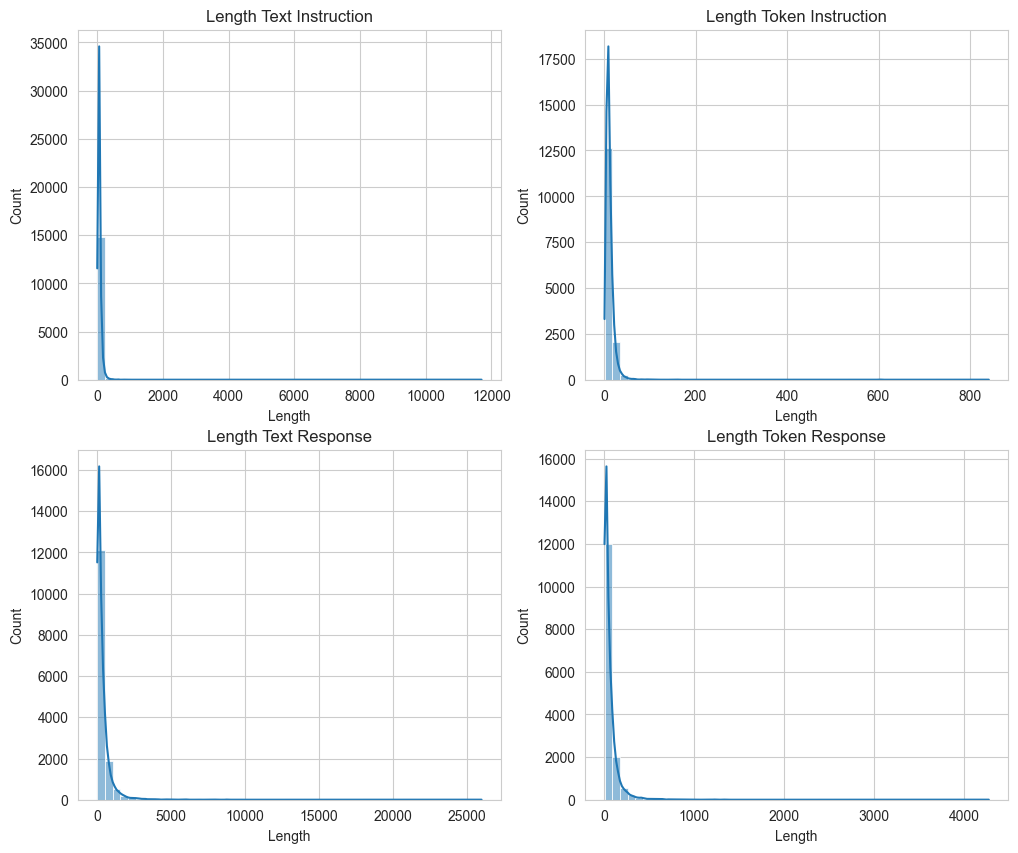

In [31]:
# Distribution length text and length token
def length(series: pd.Series):
    length_text = series.apply(len)
    length_token = series.apply(lambda x: len(x.split()))
    return length_text, length_token

instruction_text, instruction_token = length(df['instruction'])
response_text, response_token = length(df['response'])

fig, ax = plt.subplots(2,2, figsize=(12,10));
# Plot instruction
sns.histplot(instruction_text, kde=True, bins=50, ax=ax[0,0])
ax[0,0].set_title('Length Text Instruction')
ax[0,0].set_xlabel('Length')
ax[0,0].set_ylabel('Count')

sns.histplot(instruction_token, kde=True, bins=50, ax=ax[0,1])
ax[0,1].set_title('Length Token Instruction')
ax[0,1].set_xlabel('Length')
ax[0,1].set_ylabel('Count')

# Plot response
sns.histplot(response_text, kde=True, bins=50, ax=ax[1,0])
ax[1,0].set_title('Length Text Response')
ax[1,0].set_xlabel('Length')
ax[1,0].set_ylabel('Count')

sns.histplot(response_token, kde=True, bins=50, ax=ax[1,1])
ax[1,1].set_title('Length Token Response')
ax[1,1].set_xlabel('Length')
ax[1,1].set_ylabel('Count')

plt.show()

Ofc, length text and token response more large than instruction but with this graph we can choose how many token in sentence and how long text that we train

Let's we see distribution of category in dataset this

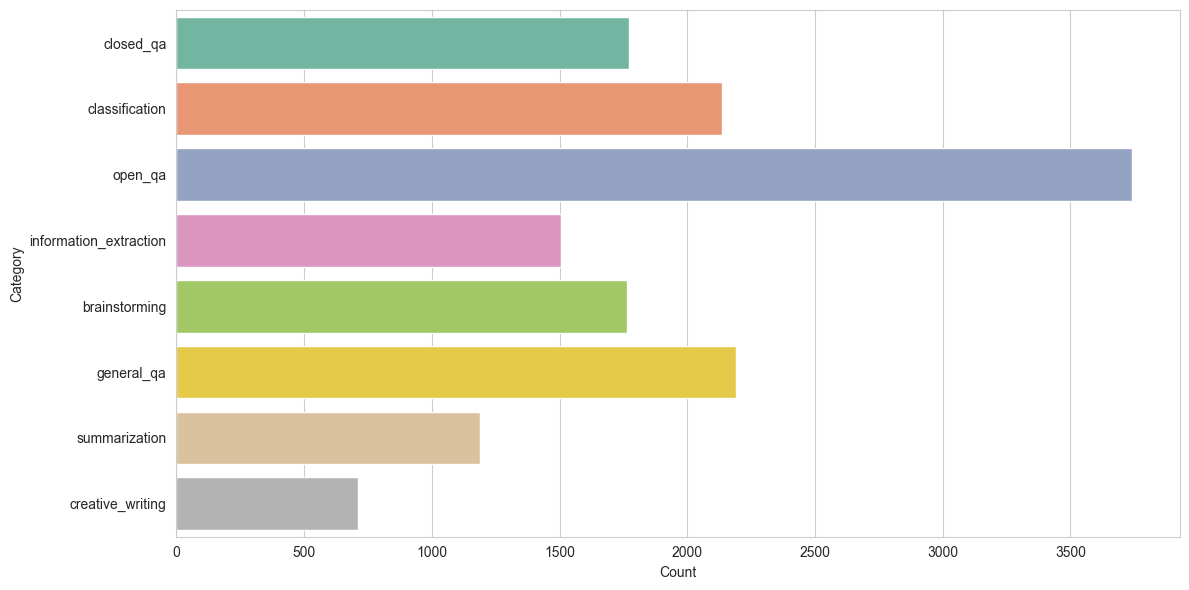

In [33]:
# Distribution of category
sns.countplot(y='category', data=df, palette='Set2')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

We also need see how instruction and response each category, now u can see at below that:

In [42]:
# Examples instruction and response each category
print("-"*30)
for label in df['category'].unique().tolist():
    row = df[df['category'] == 'general_qa'].sample(1)
    print(f"Category: {label}")
    print(f"Instruction: {row['instruction']}")
    print(f"Response: {row['response']}")
    print('-'*30)

------------------------------
Category: closed_qa
Instruction: 6649    Why do gas prices go high in winter
Name: instruction, dtype: object
Response: 6649    Prices in a market economy are driven by Suppl...
Name: response, dtype: object
------------------------------
Category: classification
Instruction: 11085    Why did Captain Bligh sail to Tahiti?
Name: instruction, dtype: object
Response: 11085    The British Navy assigned then-Lieutenant Will...
Name: response, dtype: object
------------------------------
Category: open_qa
Instruction: 7936    What are the most airplanes to learn how to fly?
Name: instruction, dtype: object
Response: 7936    The most popular single engine propeller plane...
Name: response, dtype: object
------------------------------
Category: information_extraction
Instruction: 917    Why do humans like dogs?
Name: instruction, dtype: object
Response: 917    Dogs are very popular pets. People like dogs f...
Name: response, dtype: object
------------------------

now, we want to see each word in instruction and response in WordCloud graph

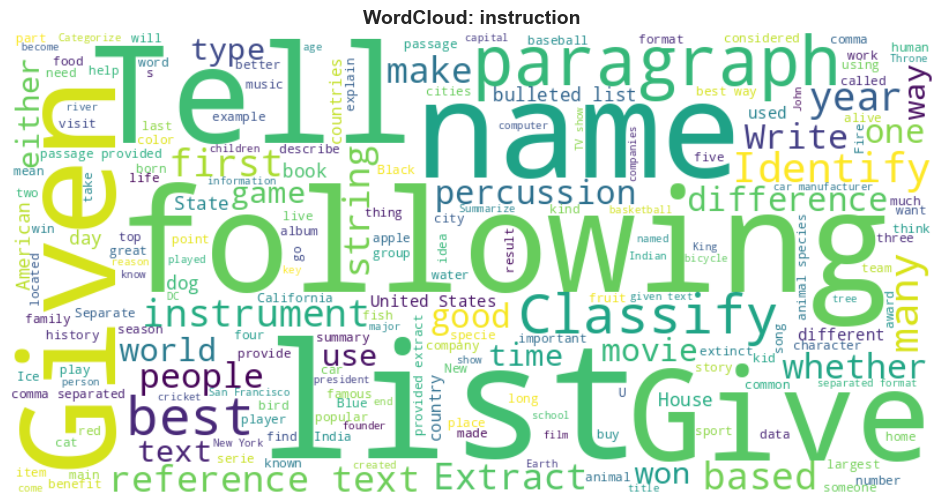

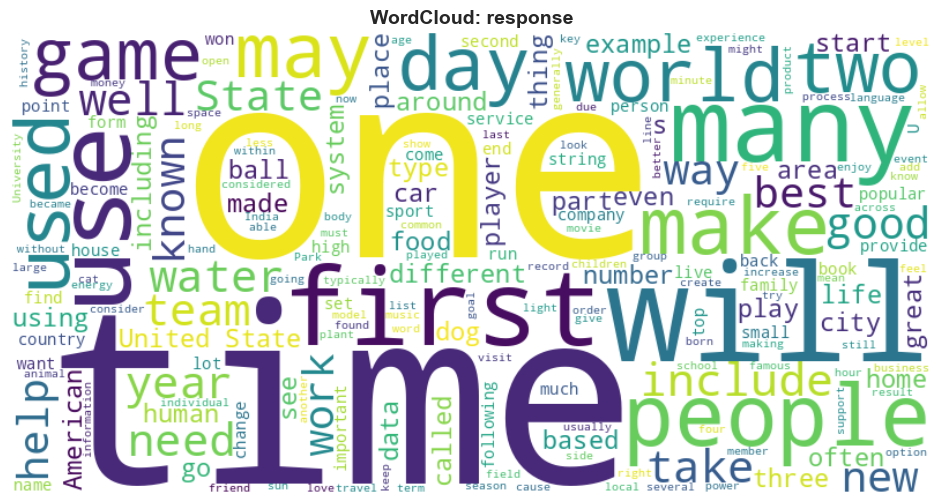

In [50]:
def wordcloud(columns):
    text = ''.join(columns)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    return wc

for columns in ['instruction', 'response']:
    wc = wordcloud(df[columns])

    # Plot
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud: {columns}', fontweight='bold', fontsize=14)
    plt.axis('off')
    plt.show()

This notebooks literally just to exploration, for see what that there are in this dataset "Dolly-15k"